In [9]:
import boto3
import json
import pandas
import matplotlib
import matplotlib.pyplot as plt

In [7]:
s3_client = boto3.client('s3')
bucket = 'willjeventdata'
key = 'stubhub_events.pkl'
response = s3_client.get_object(Bucket=bucket, Key=key)
event_dict = (response['Body'].read())
event_json = json.loads(event_dict.decode('utf8'))
master_event_df = pd.DataFrame.from_dict(event_json)
print('The S3 JSON list now has ' + str(len(master_event_df)) + ' records')
print(master_event_df.head(10))

The S3 JSON list now has 1956105 records
          ID      artist               artist_id              city  \
0  103850042  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          Budapest   
1  103863929  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V            Lisboa   
2  103854884  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V            Prague   
3  103845472  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V            Prague   
4  103856986  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V  Decines Charpieu   
5  103850763  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          Budapest   
6  103840306  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V         Barcelona   
7  103843850  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V          Bordeaux   
8  103852600  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V            Lisboa   
9  103844504  Ed Sheeran  6eUKZXaKkcviH0Ku9w2n3V  Decines Charpieu   

       create_ts       date_UTC event_id  highest_price  listing_count  \
0  1557862600000  1565166600000     None         575.00              7   
1  1557862600000  1559502000000     None

In [8]:
test_df = master_event_df.loc[(master_event_df['artist']=='FINNEAS') & (master_event_df['city']=='Brooklyn')]
print(test_df)

                ID   artist artist_id      city                   create_ts  \
132722   104301185  FINNEAS            Brooklyn               1566862462614   
138279   104301185  FINNEAS            Brooklyn               1566867925989   
143839   104301185  FINNEAS            Brooklyn               1566876869260   
149391   104301185  FINNEAS            Brooklyn               1566886026599   
154942   104301185  FINNEAS            Brooklyn               1566895022697   
...            ...      ...       ...       ...                         ...   
1934591  104301185  FINNEAS            Brooklyn               1569963904213   
1939812  104301185  FINNEAS            Brooklyn               1569972807511   
1945429  104301185  FINNEAS            Brooklyn  2019-10-03 01:41:44.940046   
1950618  104301185  FINNEAS            Brooklyn  2019-10-03 03:35:07.719465   
1955801  104301185  FINNEAS            Brooklyn  2019-10-03 06:05:02.814680   

                    date_UTC event_id  highest_pric

In [15]:
finneas_distinct = test_df[['artist', 'city', 'venue', 'create_ts']]
print(finneas_distinct)

          artist      city   venue                   create_ts
132722   FINNEAS  Brooklyn  Warsaw               1566862462614
138279   FINNEAS  Brooklyn  Warsaw               1566867925989
143839   FINNEAS  Brooklyn  Warsaw               1566876869260
149391   FINNEAS  Brooklyn  Warsaw               1566886026599
154942   FINNEAS  Brooklyn  Warsaw               1566895022697
...          ...       ...     ...                         ...
1934591  FINNEAS  Brooklyn  Warsaw               1569963904213
1939812  FINNEAS  Brooklyn  Warsaw               1569972807511
1945429  FINNEAS  Brooklyn  Warsaw  2019-10-03 01:41:44.940046
1950618  FINNEAS  Brooklyn  Warsaw  2019-10-03 03:35:07.719465
1955801  FINNEAS  Brooklyn  Warsaw  2019-10-03 06:05:02.814680

[339 rows x 4 columns]


ValueError: could not convert string to float: '2019-10-03 01:41:44.940046'

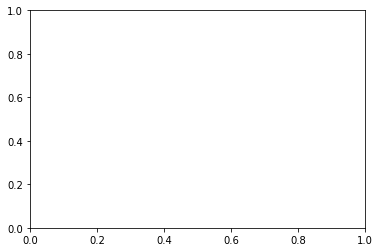

In [12]:
plt.plot(test_df['create_ts'], test_df['lowest_price'], '*')

In [3]:
connection = pymysql.connect(host='ticketsdb.cxrz9l1i58ux.us-west-2.rds.amazonaws.com',
                                 user='tickets_user',
                                 password='tickets_pass',
                                 db='tickets_db')

joined_event_df = pd.read_sql('SELECT * FROM test', con=connection)

In [7]:
joined_event_df['create_datetime'] = pd.to_datetime(joined_event_df['create_date'])

In [9]:
print(joined_event_df.head(10))

      artist         city state            date_UTC                    venue  \
0  070 Shake      Detroit    MI 2019-10-05 02:30:00                  El Club   
1  070 Shake      Toronto    ON 2019-10-06 23:30:00  The Opera House Toronto   
2  070 Shake     New York    NY 2019-10-10 00:00:00             Webster Hall   
3  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   
4  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   
5  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   
6  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   
7  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   
8  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   
9  21 Savage  Los Angeles    CA 2019-07-20 04:00:00         Shrine Expo Hall   

  create_date  stubhub_lowest_price  stubhub_highest_price  \
0  2019-08-26                 53.79                  85.4

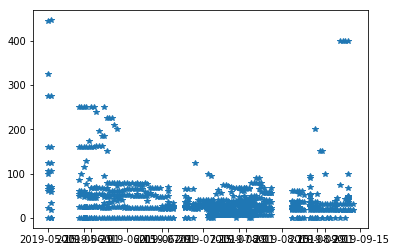

In [13]:
joined_event_df = joined_event_df.sort_values('create_datetime', ascending=True)
plt.plot(joined_event_df['create_datetime'], joined_event_df['stubhub_lowest_price'], '*')

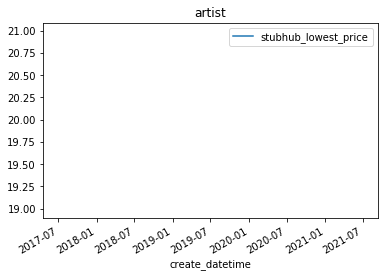

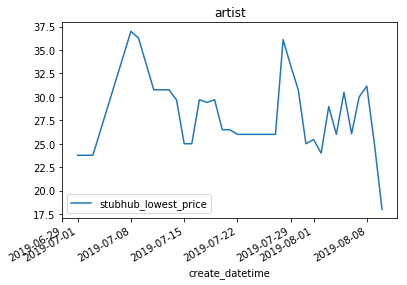

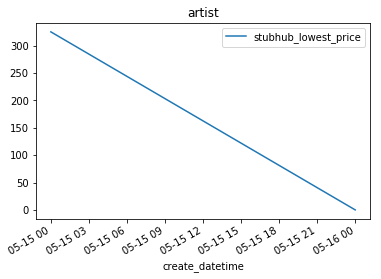

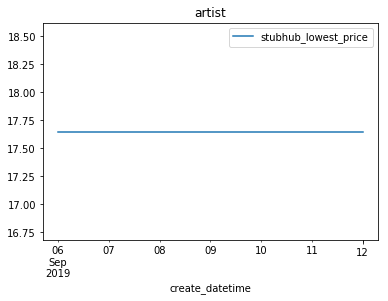

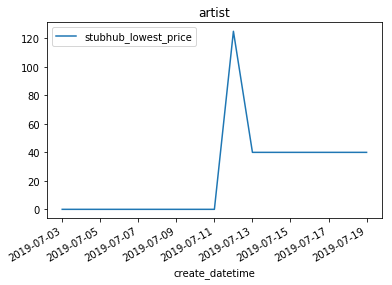

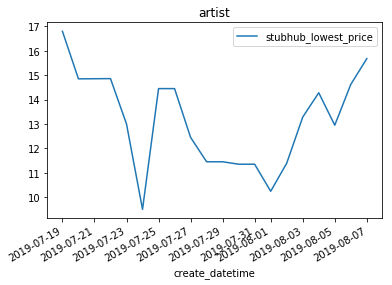

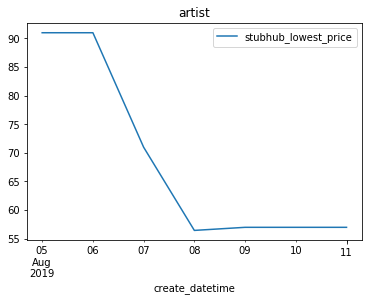

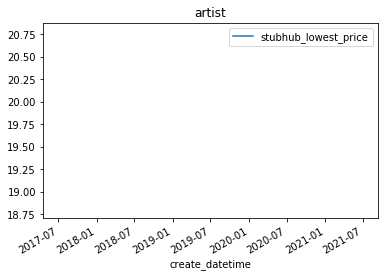

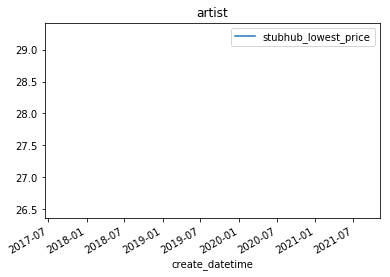

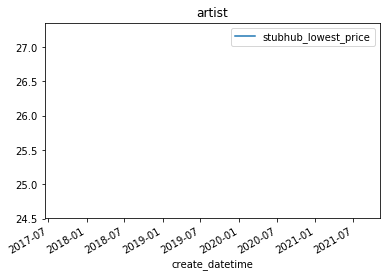

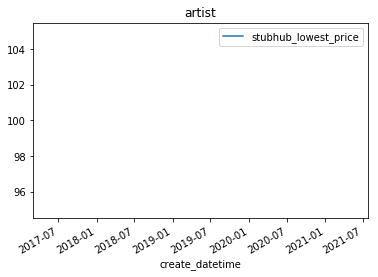

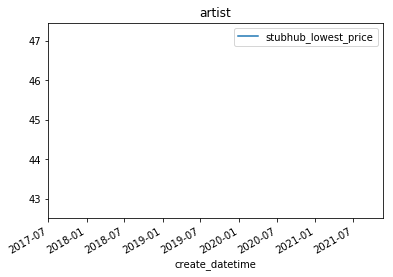

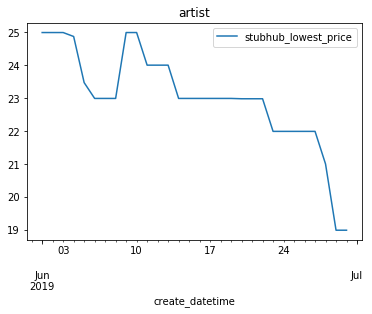

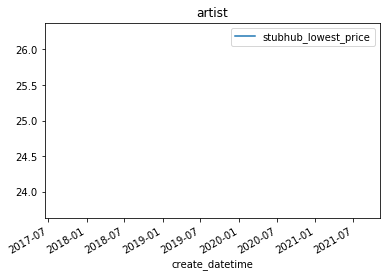

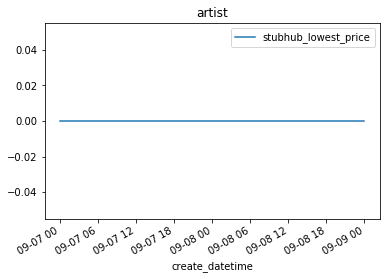

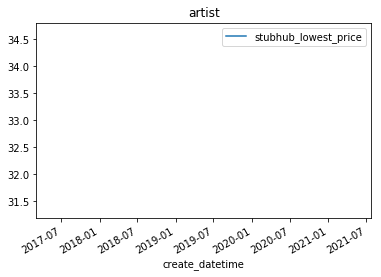

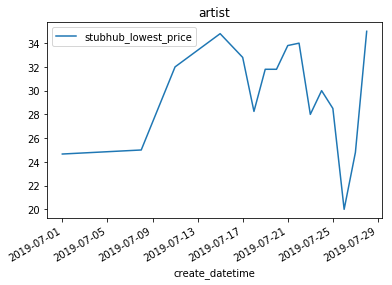

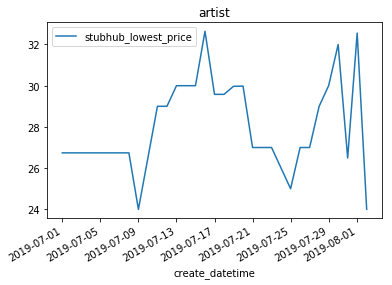

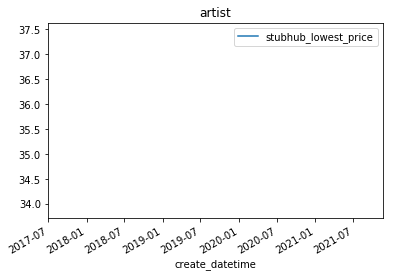

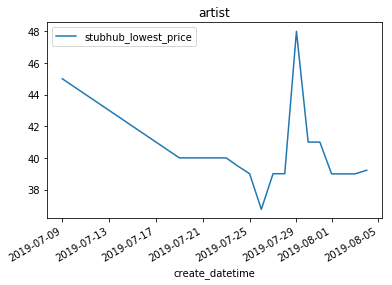

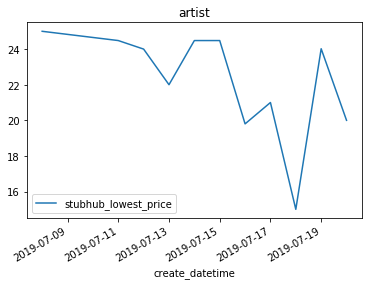

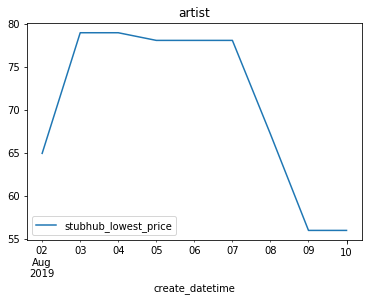

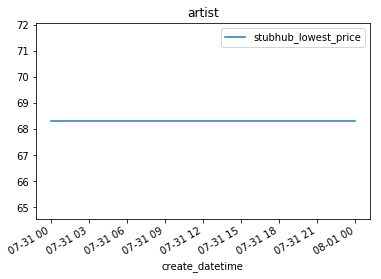

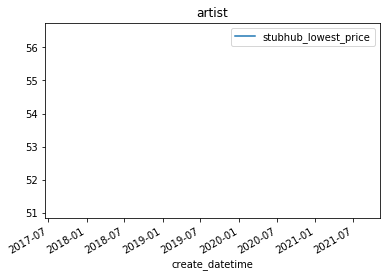

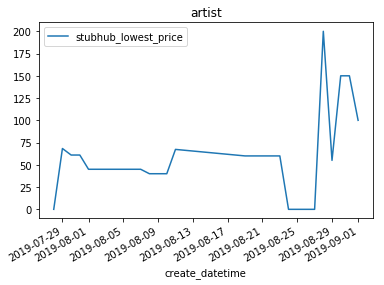

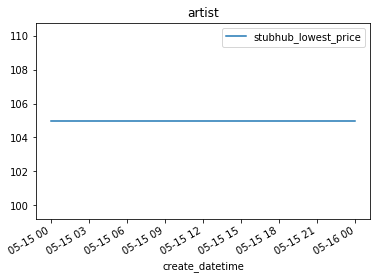

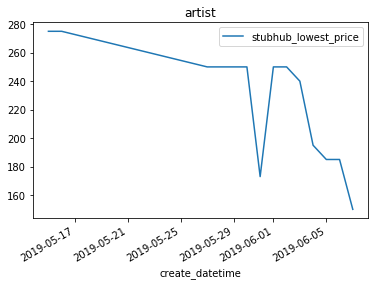

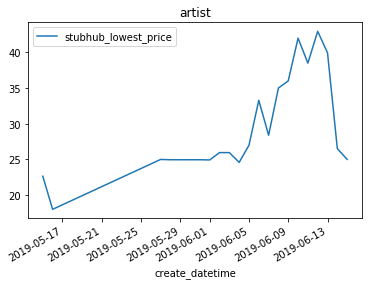

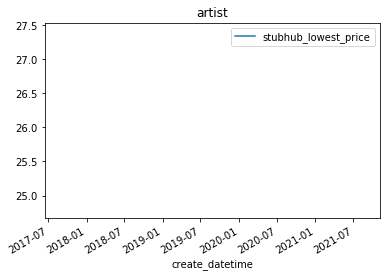

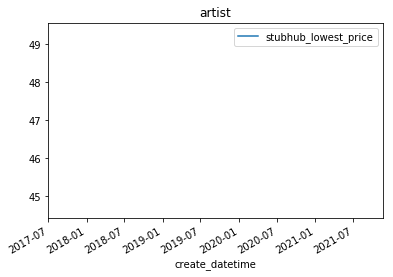

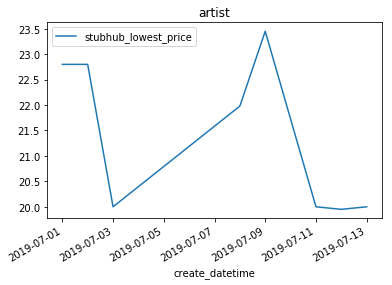

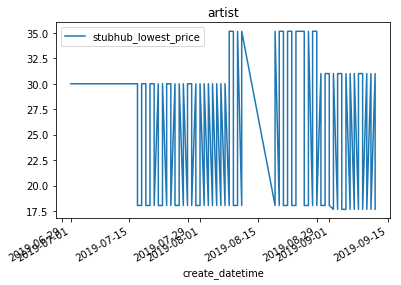

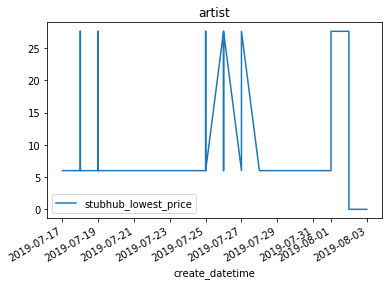

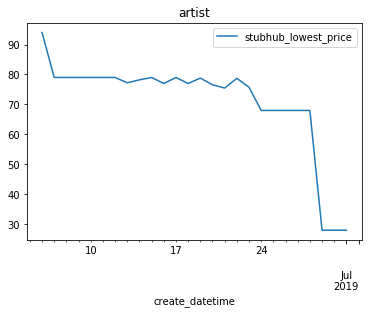

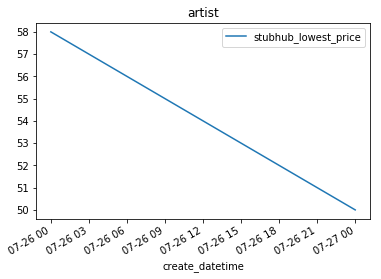

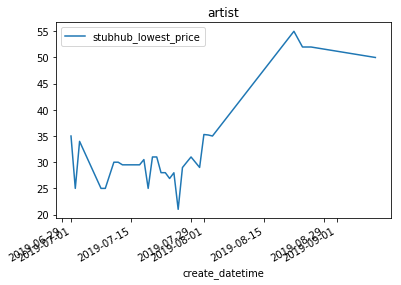

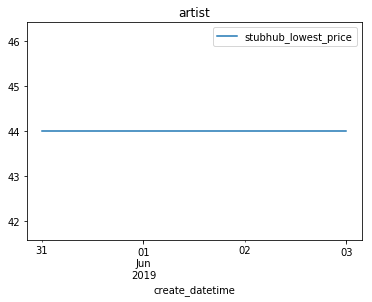

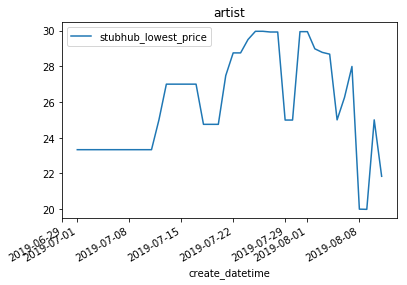

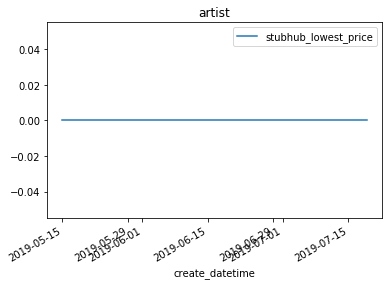

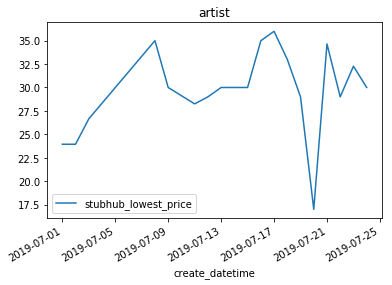

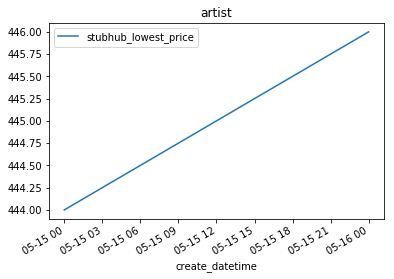

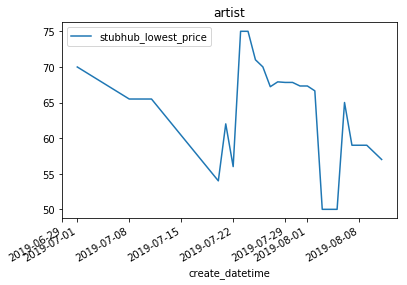

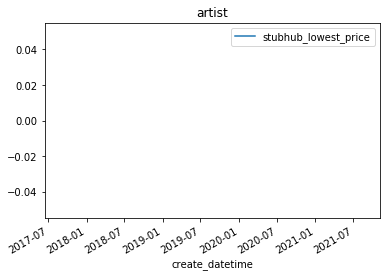

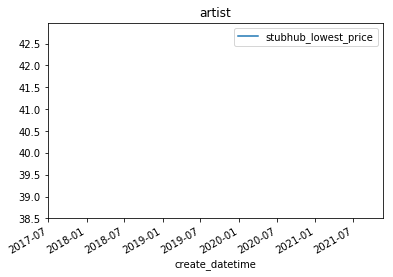

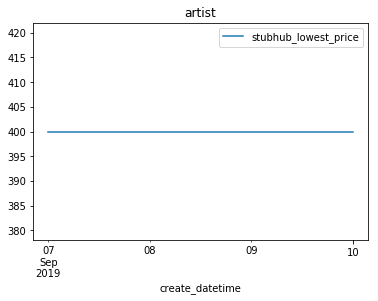

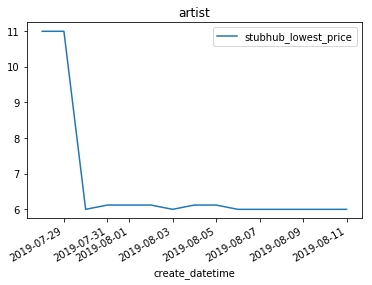

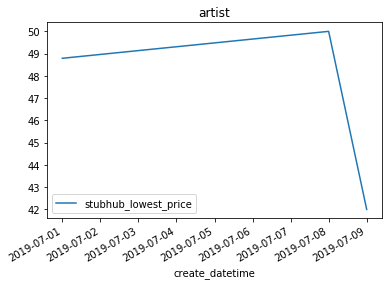

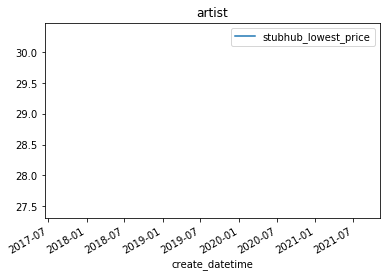

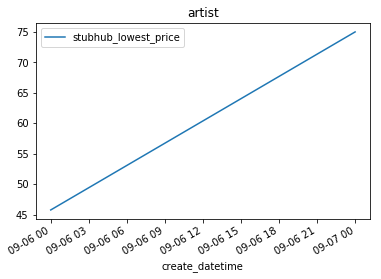

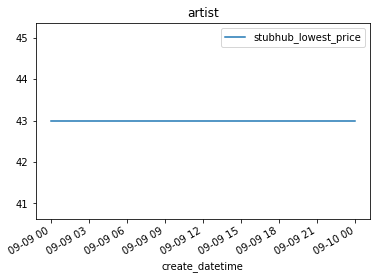

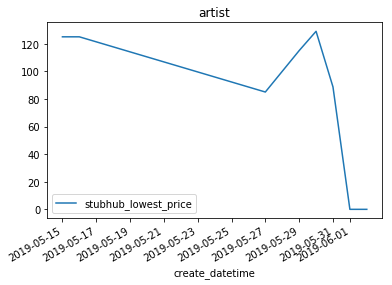

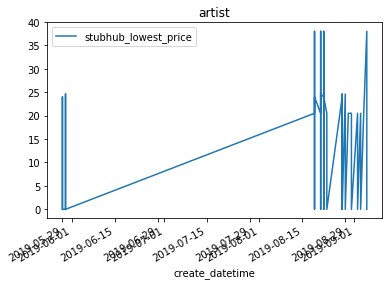

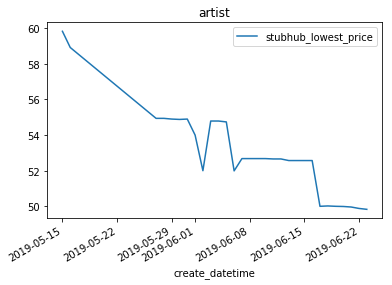

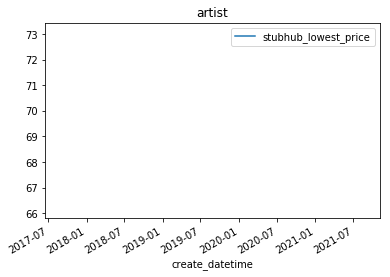

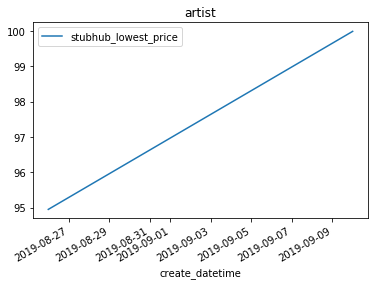

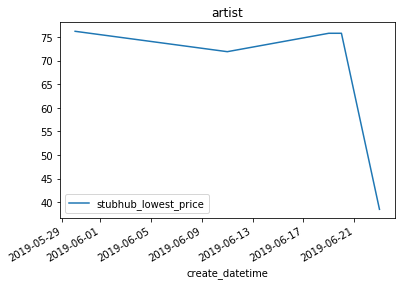

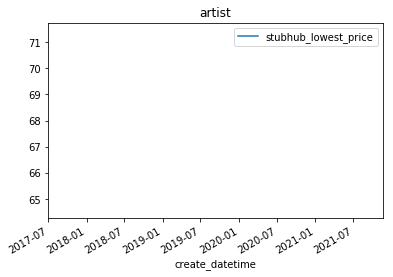

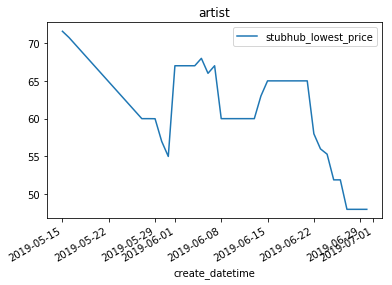

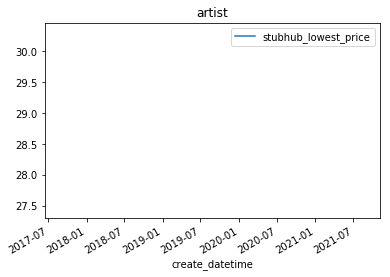

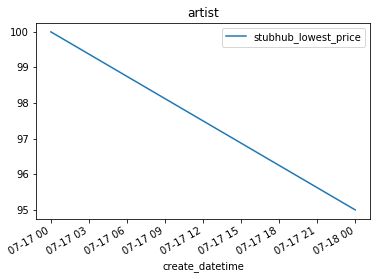

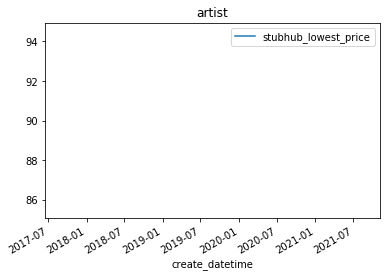

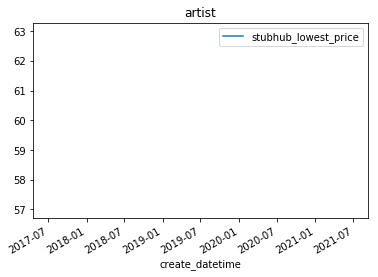

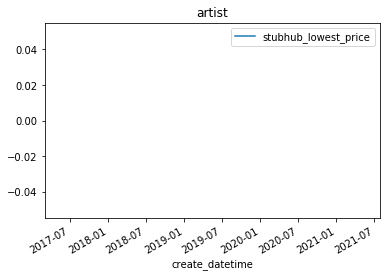

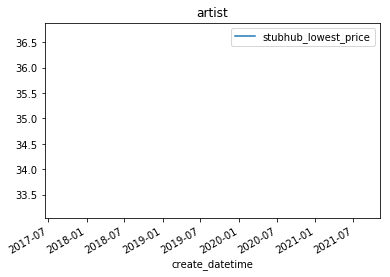

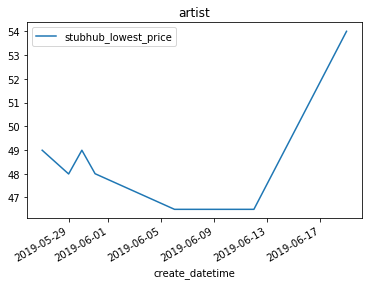

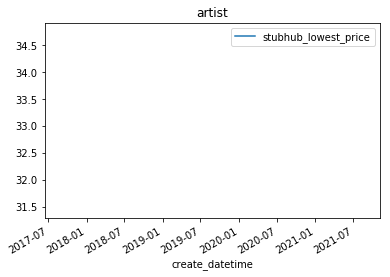

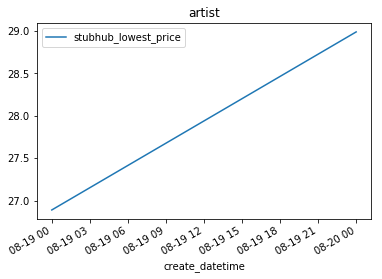

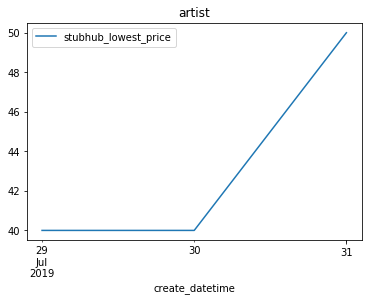

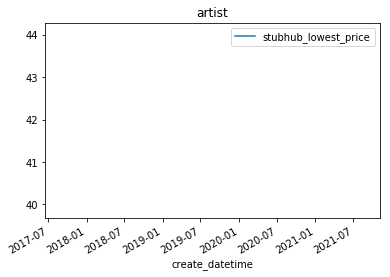

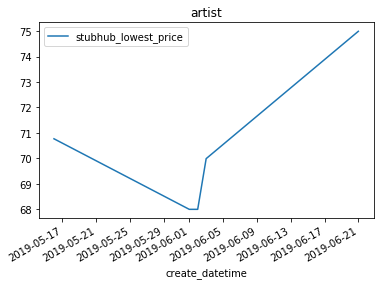

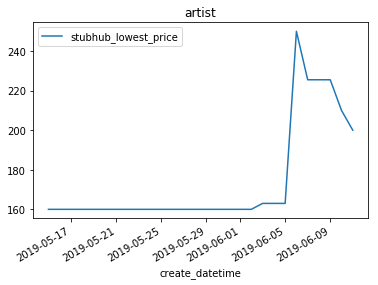

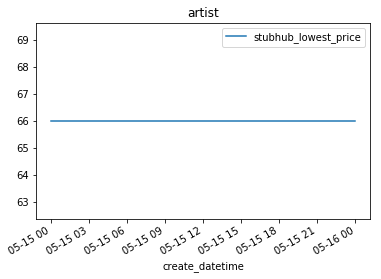

In [25]:
for title, group in joined_event_df.groupby('venue'):
    group.plot(x='create_datetime', y='stubhub_lowest_price', title='artist')

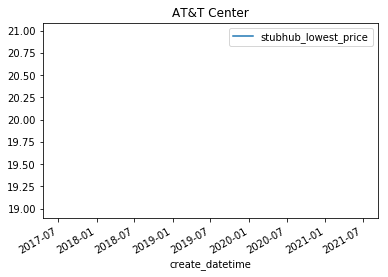

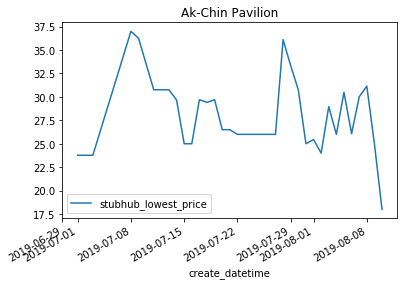

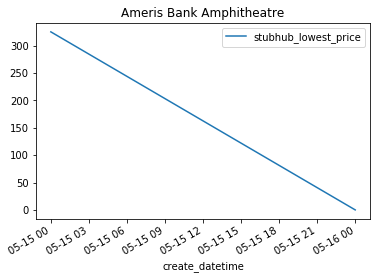

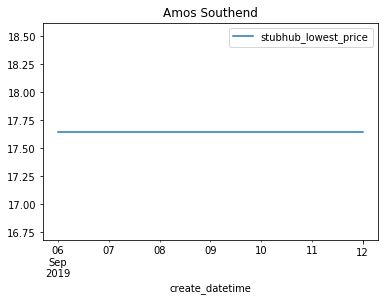

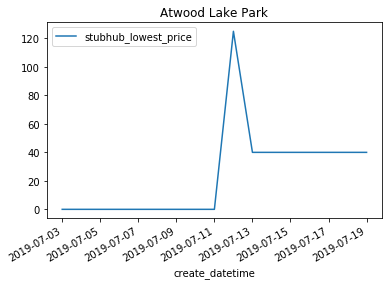

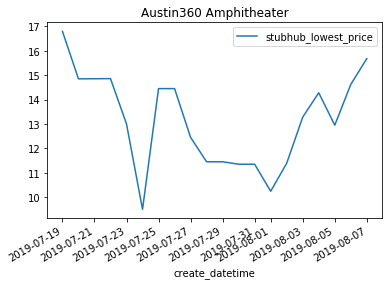

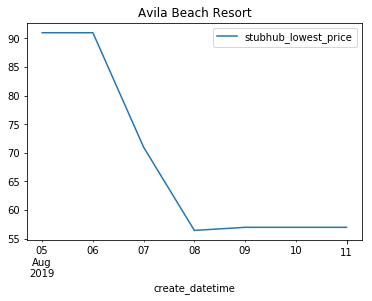

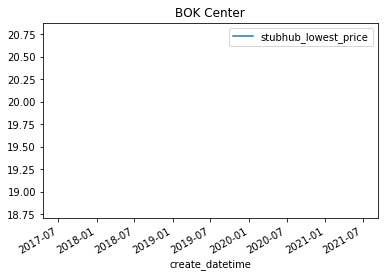

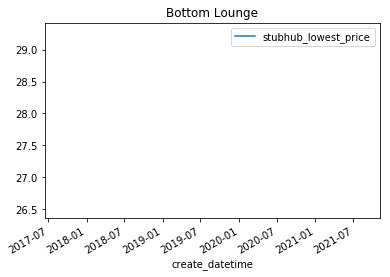

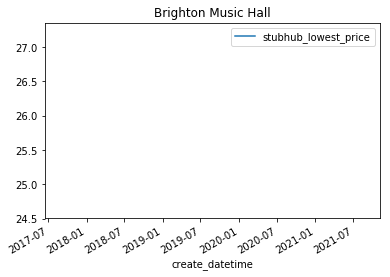

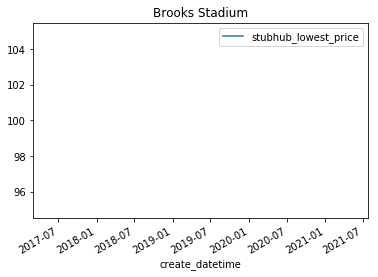

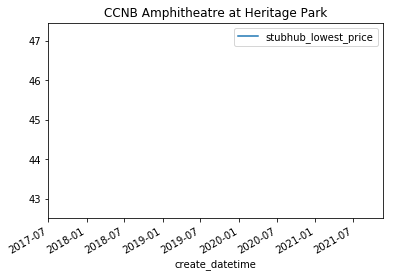

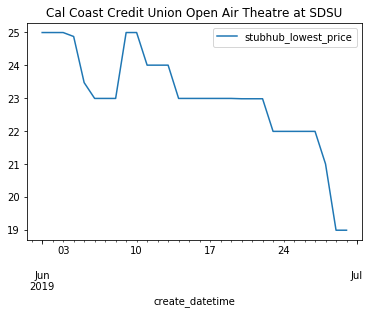

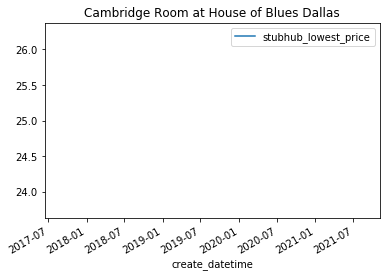

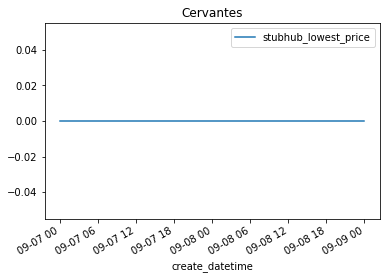

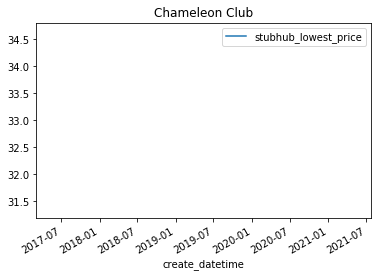

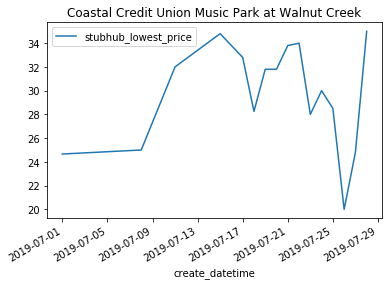

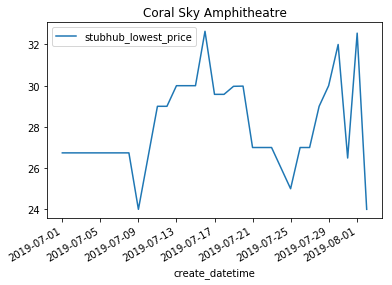

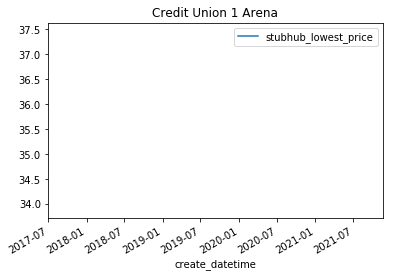

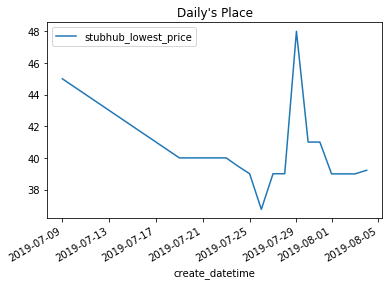

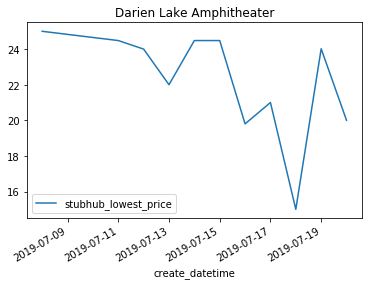

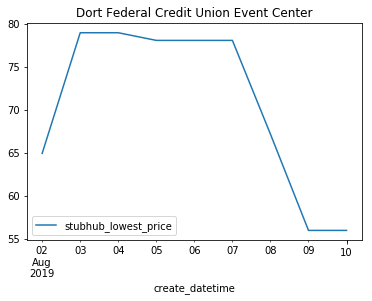

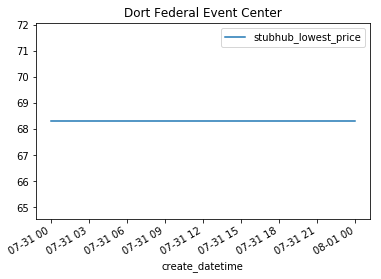

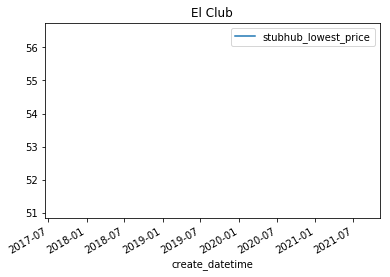

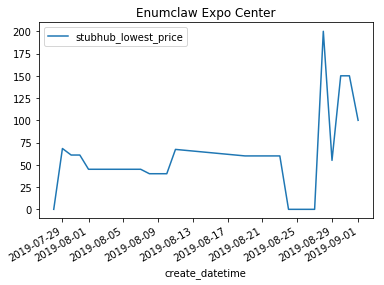

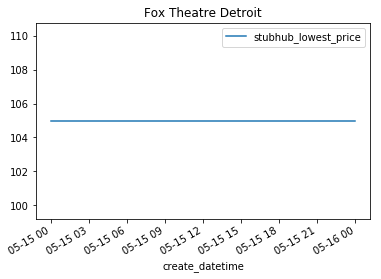

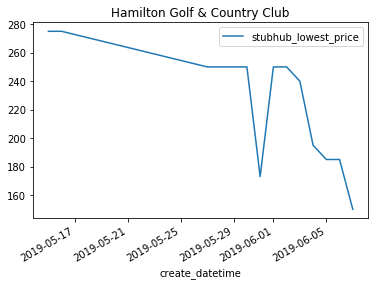

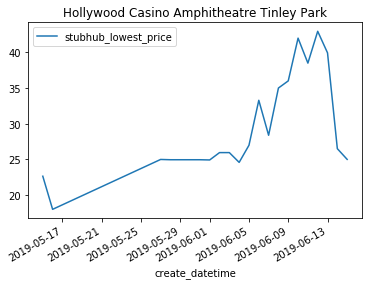

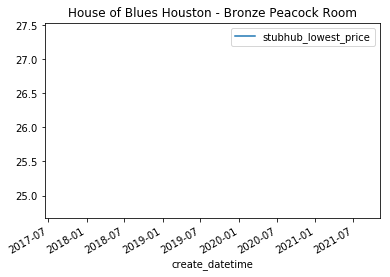

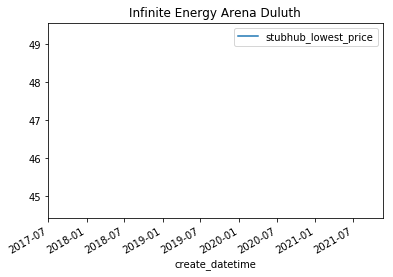

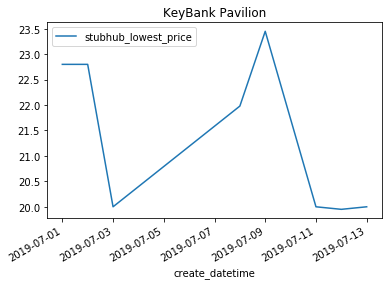

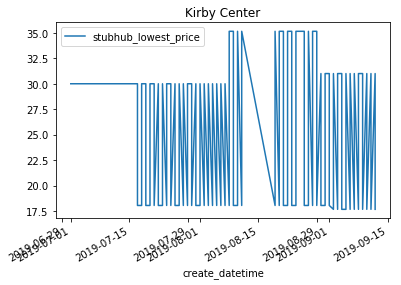

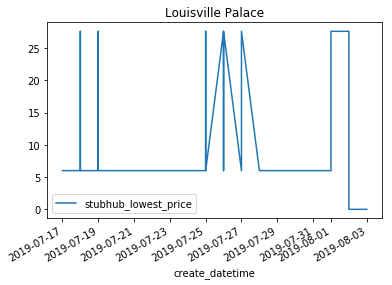

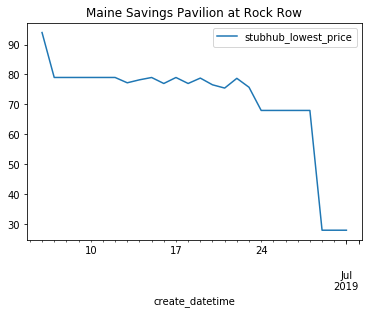

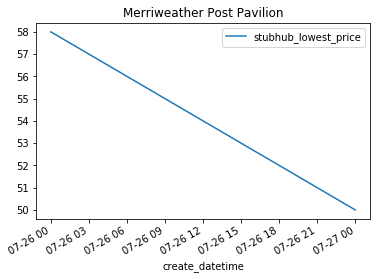

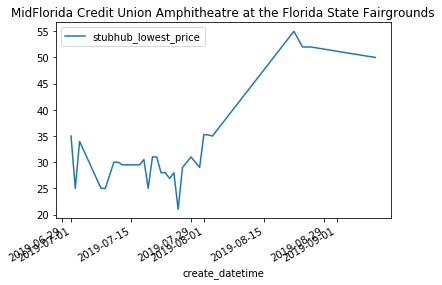

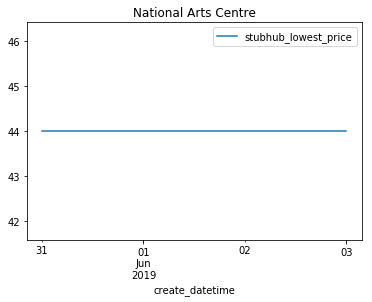

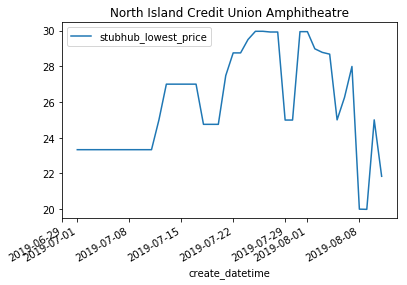

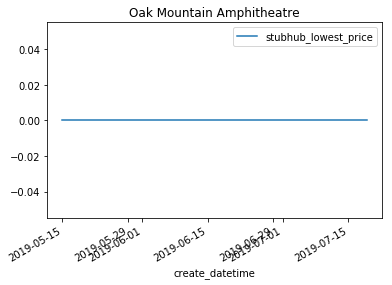

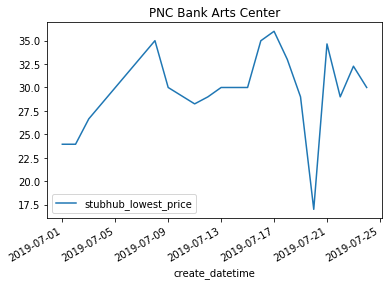

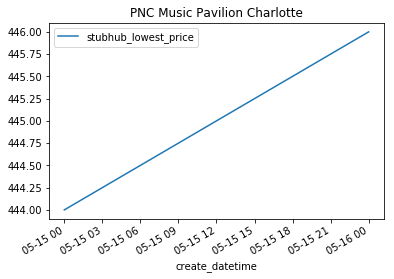

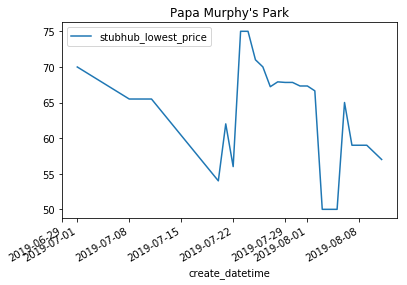

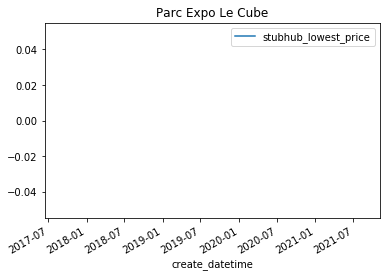

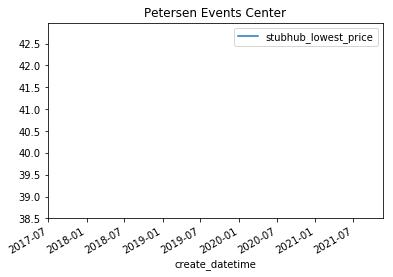

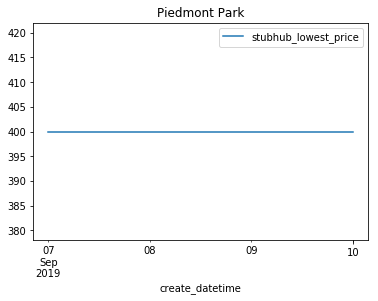

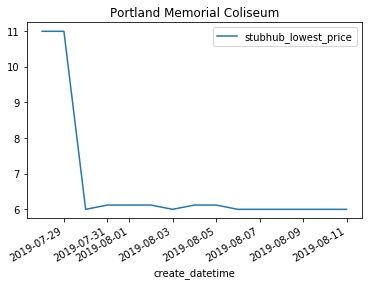

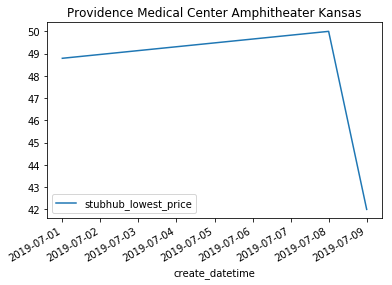

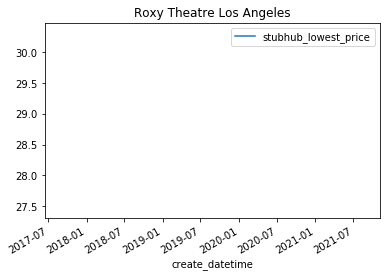

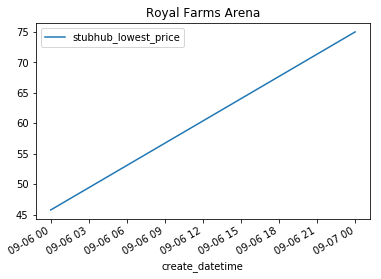

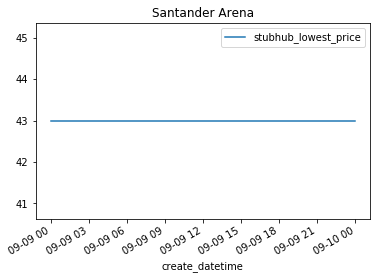

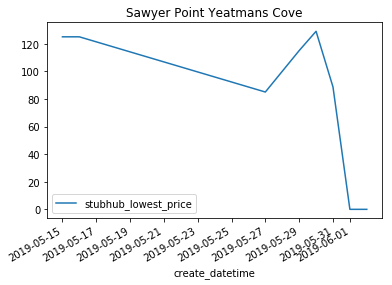

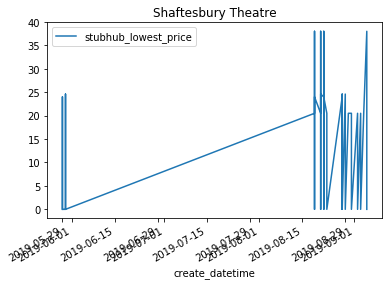

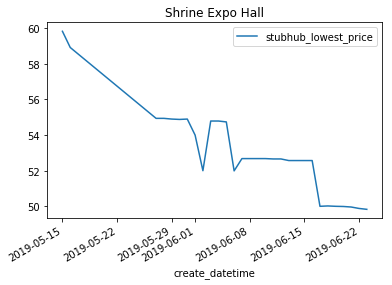

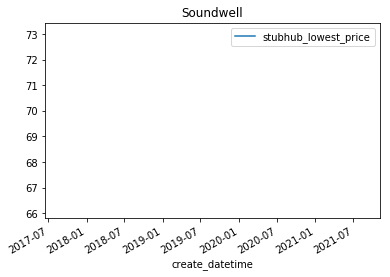

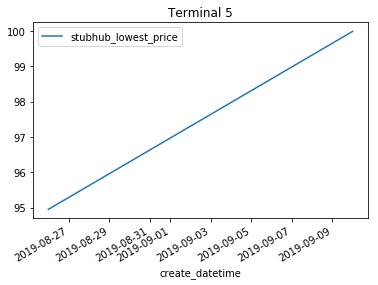

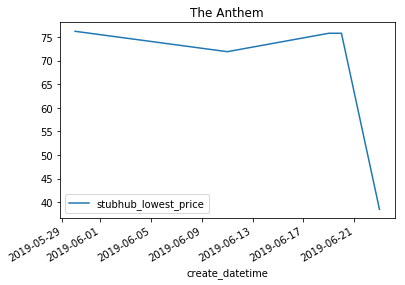

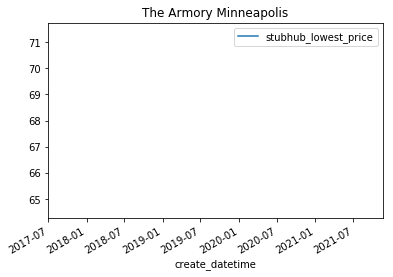

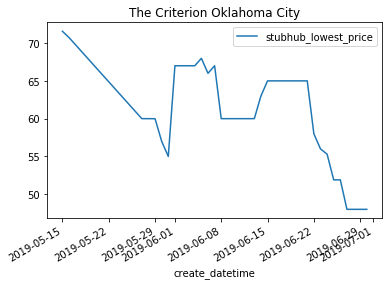

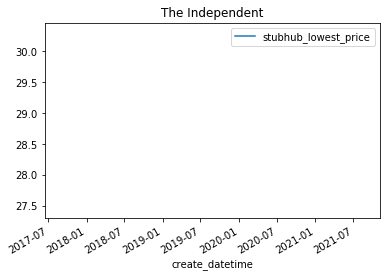

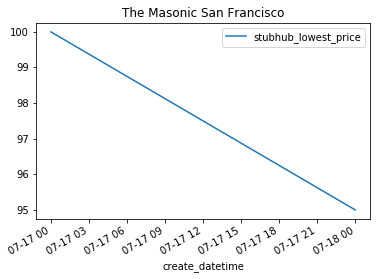

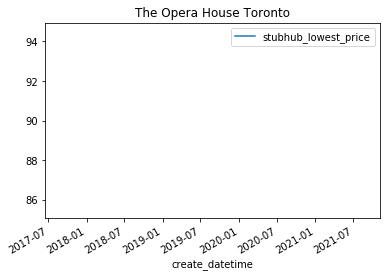

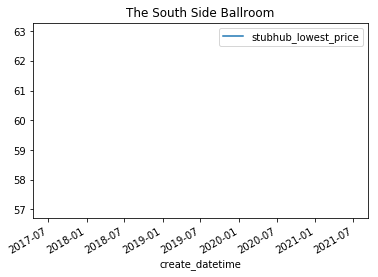

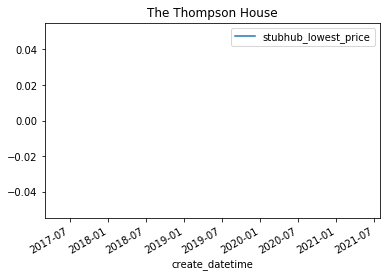

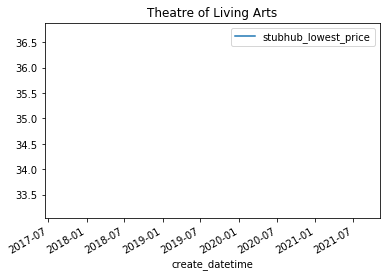

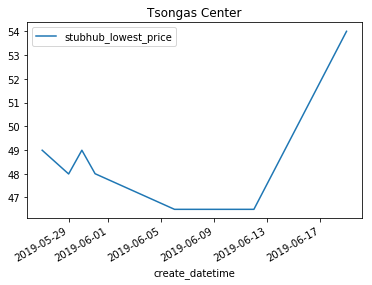

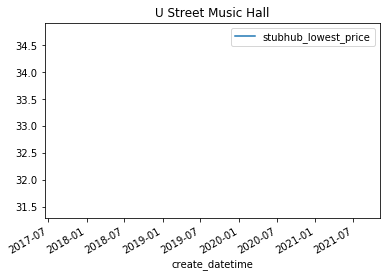

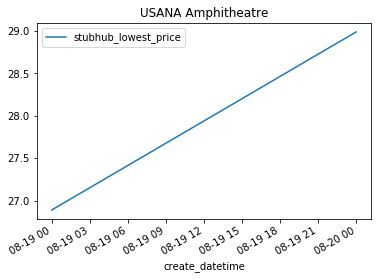

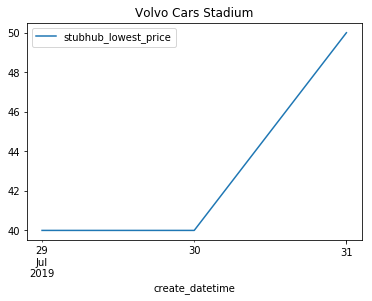

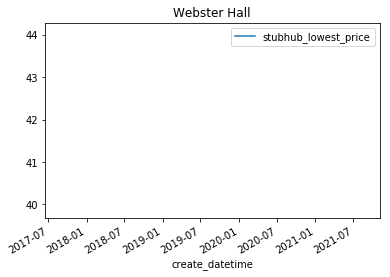

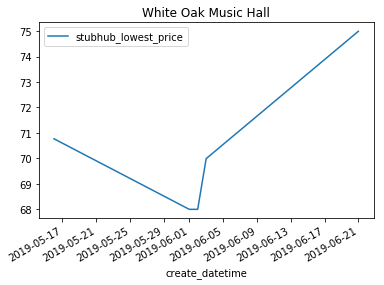

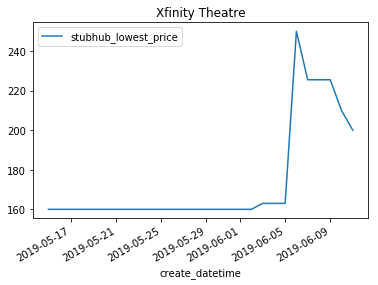

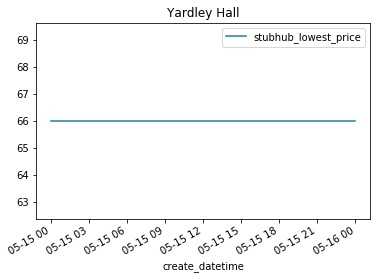

In [35]:
grouped = joined_event_df.groupby('venue')

for key, group in grouped:
    each_group = grouped.get_group(key)
    each_group.plot(x='create_datetime', y='stubhub_lowest_price', title=key)
    # grouped.get_group(key).plot(x='create_datetime', y='stubhub_lowest_price')